In [52]:
import pandas as pd #type:ignore
import numpy as np #type:ignore
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv('NLS_Group01.txt',sep=' ', header=None, names=['x1', 'x2']).reset_index()
df=df.rename(columns={'index':'x1','x1':'x2'}).dropna(axis=1)
df 


,x1,x2
0,-0.380352,-0.390977
1,-0.416680,0.214674
2,-0.974757,0.263573
3,-1.129312,-0.387884
4,1.054486,-0.333915
...,...,...
1795,4.221331,-0.045618
1796,4.483162,2.921077
1797,-0.524097,3.659981
1798,-3.563939,-4.183029


In [54]:
df['Class'] = [1 if i < 300 else 2 if i < 800 else 3 for i in range(len(df))]
df

,x1,x2,Class
0,-0.380352,-0.390977,1
1,-0.416680,0.214674,1
2,-0.974757,0.263573,1
3,-1.129312,-0.387884,1
4,1.054486,-0.333915,1
...,...,...,...
1795,4.221331,-0.045618,3
1796,4.483162,2.921077,3
1797,-0.524097,3.659981,3
1798,-3.563939,-4.183029,3


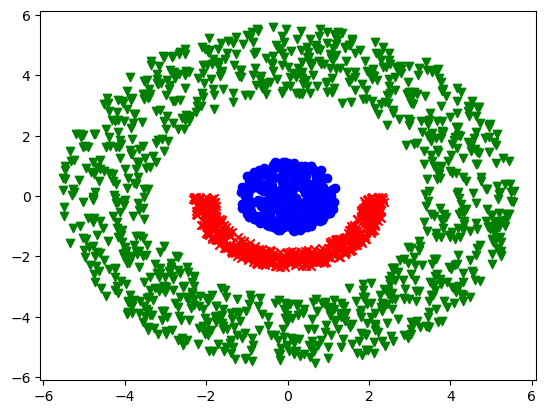

In [55]:
fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(x=df['x1'].loc[df['Class']==1],y=df['x2'].loc[df['Class']==1],c='blue',marker='o')
ax.scatter(x=df['x1'].loc[df['Class']==2],y=df['x2'].loc[df['Class']==2],c='red',marker='x')
ax.scatter(x=df['x1'].loc[df['Class']==3],y=df['x2'].loc[df['Class']==3],c='green',marker='v')

In [56]:
def split(df,savingpathtrain,savingpathtest):
    train=df.sample(frac=0.7)
    test=df.drop(train.index,inplace=False)
    train.to_csv(savingpathtrain)
    test.to_csv(savingpathtest)
    return train,test

In [58]:
train,test=split(df,'train.csv','test.csv')